# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jaćimović (), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [81]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import custom modules
import vis_tools as vt
import dla_model as dm
import dla_simulation as ds
import cs_measures as cm

from importlib import reload

## 2. Baseline Algorithm

In [2]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\dla_model.py'>

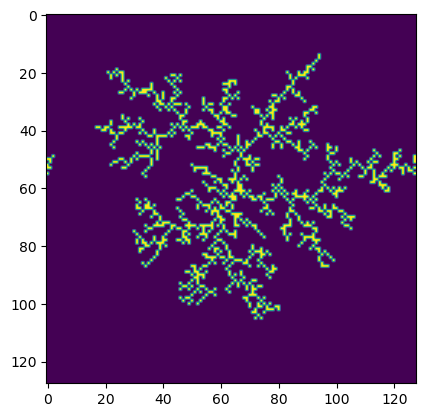

In [3]:
# Time / space parameters
size = 128
steps = 1000

# Initialize lattice
seeds = np.array([(int(size*0.5), int(size*0.5))])
lattice = dm.init_lattice(size, seeds)

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density)

# Arrays for storing data frames
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=(False, True), moore=True)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, periodic=(False, True), moore=True)
    # print(f"step {step}: {current_lattice}")

vt.animate_lattice_2D(lattice_frames, interval=10)

## 3. Fractal Dimension

In [167]:
# Reload module
reload(cm)
reload(vt)

<module 'vis_tools' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

128
[2.         1.85021986 1.72330833 1.68536675 1.63598182 1.57174209
 1.44795847]


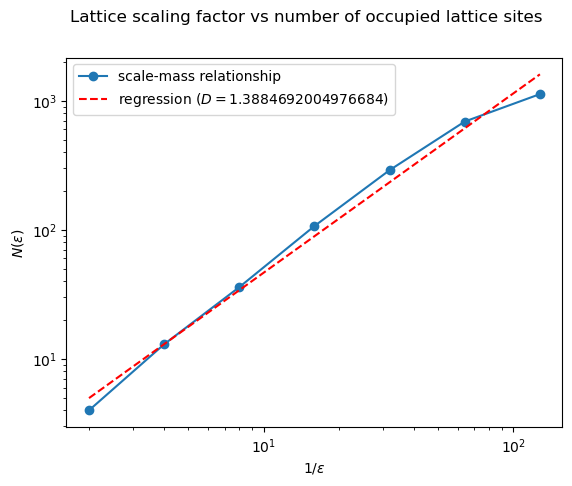

In [168]:
print(current_lattice.shape[0])
fractal_dims, scales, n_boxes, coeffs = cm.fractal_dimension_clusters(current_lattice)

print(fractal_dims)

vt.plot_fractal_dimension(scales, n_boxes, coeffs)

## 4. Simulation Series

In [200]:
reload(dm)
reload(ds)
reload(cm)

<module 'cs_measures' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

In [201]:
# Define environment parameter series
lattice_size_series = np.array([128])
max_timesteps_series = np.array([5000])
seeds_series = np.array([[[32, 32]]])
particle_density_series = np.array([0.1])
target_mass_series = np.array([int(0.025 * lattice_size_series[0]**2), int(0.05 * lattice_size_series[0]**2)])

# Define fixed simulation parameters
radius_scale_mode = True
track_radius = True
periodic = (False, True)
move_moore = False
aggr_moore = False
regen_toggle = False

# Run simulations
n_sims = 5
sim_results, dla_evolutions = ds.analyse_fractal_dimension(n_sims, lattice_size_series, max_timesteps_series, seeds_series, particle_density_series, target_mass_series, 
                                                           radius_scale_mode=radius_scale_mode, n_saved_sims=1, track_radius=track_radius,
                                                           periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_toggle=regen_toggle)

Running parameters: lattice_size: 128; max_timesteps: 5000; seeds: [[32 32]]; particle_density: 0.1; target_mass: 409
Running simulation 1 of 5
Running simulation 2 of 5
Running simulation 3 of 5
Running simulation 4 of 5
Running simulation 5 of 5
Running parameters: lattice_size: 128; max_timesteps: 5000; seeds: [[32 32]]; particle_density: 0.1; target_mass: 819
Running simulation 1 of 5
Running simulation 2 of 5
Running simulation 3 of 5
Running simulation 4 of 5
Running simulation 5 of 5


In [202]:
sim_results

[{'lattice_size': 128,
  'max_timesteps': 5000,
  'seeds': [array([32, 32])],
  'particle_density': 0.1,
  'target_mass': 409,
  'dim_box_series': array([0.       , 0.       , 0.       , ..., 1.6599086, 1.6605865,
         1.6605865]),
  'scale_series': array([ 2.        ,  2.        ,  2.        , ..., 37.33630941,
         37.33630941, 37.33630941]),
  'n_box_series': array([  1.,   1.,   1., ..., 407., 408., 408.]),
  'coeffs': array([1.50468299, 0.54614352]),
  'evol_ref': 0},
 {'lattice_size': 128,
  'max_timesteps': 5000,
  'seeds': [array([32, 32])],
  'particle_density': 0.1,
  'target_mass': 409,
  'dim_box_series': array([0.        , 0.        , 0.        , ..., 1.78237407, 1.78237407,
         1.78237407]),
  'scale_series': array([ 2.        ,  2.        ,  2.        , ..., 29.15475947,
         29.15475947, 29.15475947]),
  'n_box_series': array([  1.,   1.,   1., ..., 408., 408., 408.]),
  'coeffs': array([ 1.94016467, -0.48982183]),
  'evol_ref': None},
 {'lattice_size':